In [308]:
import pandas as pd
import numpy as np
import datetime as dt

In [309]:
#Калькулятор ежемесячного аннуитетного платежа по ипотечному кредиту
P = 25000000
r = 0.214 #21.4% годовых
n = 360 #30 лет

In [310]:
rm = r/12 #Ставка в месяц
num = rm*(1+rm)**n #Числитель формулы
den = (1+rm)**n-1 #Знаменатель формулы
pmt = P * (num/den) #Применение полной формулы расчёта платежа
print(f'Ежемесячный платёж по ипотечному кредиту составит {pmt:.2f} руб.')

Ежемесячный платёж по ипотечному кредиту составит 446603.03 руб.


ADF Statistic: -1.5425632773927074
p-value: 0.5123607577439776


/var/folders/68/wtl2nd4s0j3fvb1d1nt0qxvh0000gn/T/ipykernel_38610/3847392046.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('ruonia_rates.csv', parse_dates=['DateUpdate'], index_col='DateUpdate')


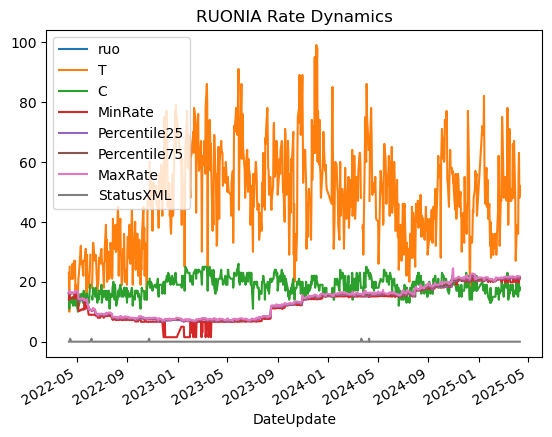

In [311]:
# Прогноз ставки RUONIA (Задание выполнено с использованием нейросети)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv('ruonia_rates.csv', parse_dates=['DateUpdate'], index_col='DateUpdate')

# Проверка стационарности
result = adfuller(data['ruo'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Визуализация
data.plot(title='RUONIA Rate Dynamics')
plt.show()

# Если ряд нестационарен - делаем дифференцирование
data['diff'] = data['ruo'].diff().dropna()

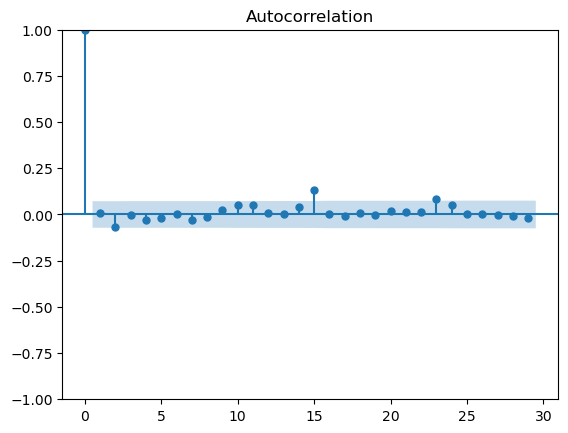

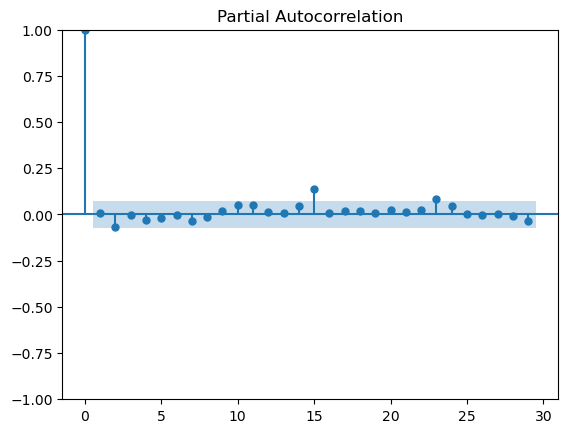

In [312]:
# Графики ACF и PACF для определения параметров
plot_acf(data['diff'].dropna())
plot_pacf(data['diff'].dropna())
plt.show()

In [313]:
from statsmodels.tsa.arima.model import ARIMA

# Подбор параметров (пример: ARIMA(1,1,1))
model = ARIMA(data['ruo'], order=(1,1,1))
model_fit = model.fit()

# Вывод статистики
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    ruo   No. Observations:                  742
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -114.331
Date:                Sun, 13 Apr 2025   AIC                            234.662
Time:                        23:35:11   BIC                            248.486
Sample:                             0   HQIC                           239.992
                                - 742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6506      0.730     -0.892      0.373      -2.081       0.780
ma.L1          0.6847      0.698      0.981      0.327      -0.683       2.053
sigma2         0.0797      0.001     97.274      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/

In [314]:
#Прогноз на 30 дней
forecast = model_fit.get_forecast(steps=30)

forecast_table = pd.DataFrame({
    'Date': forecast.predicted_mean.index,
    'Forecasted_RUONIA_Rate': forecast.predicted_mean.values,
    'Lower_CI': forecast.conf_int().iloc[:, 0],  # Lower confidence interval
    'Upper_CI': forecast.conf_int().iloc[:, 1]   # Upper confidence interval
}).set_index('Date')

display(forecast_table.style.format({
    'Forecasted_RUONIA_Rate': '{:.4f}',
    'Lower_CI': '{:.4f}',
    'Upper_CI': '{:.4f}'
}).set_caption('Daily RUONIA Rate Forecast (ARIMA)'))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Forecasted_RUONIA_Rate,Lower_CI,Upper_CI
Date,,,
742,16.2781,15.7247,16.8315
743,16.2793,15.4833,17.0753
744,16.2785,15.3053,17.2518
745,16.2791,15.1522,17.4059
746,16.2787,15.0192,17.5382
747,16.2789,14.8980,17.6598
748,16.2788,14.7872,17.7704
749,16.2789,14.6837,17.8740
750,16.2788,14.5868,17.9709


In [315]:
from sklearn.metrics import mean_squared_error

# Разделение на train/test
train = data.iloc[:-30]
test = data.iloc[-30:]

# Обучение на train
model = ARIMA(train['ruo'], order=(1,1,1))
model_fit = model.fit()

# Прогноз для test
forecast = model_fit.get_forecast(steps=30)
mse = mean_squared_error(test['ruo'], forecast.predicted_mean)
print(f'MSE: {mse}')

MSE: 21.033005013299185


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/